# Practical Lab 8 - MNIST Classification with Dense Neural Networks (using Tensorflow)

The goal of this lab is to run a good EDA on fMNIST, train a neural network using Tensorflow, evaluate it using sklearn, and provide clear conclusions.<br/>Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples.<br/>
Each training and test example is assigned to one of the following labels:

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot

In [169]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import  train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

## Loading the dataset

In [170]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# Split the training data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

## EDA

### Checking shape and sizes

In [171]:
import matplotlib.pyplot as plt
import numpy as np

print(f'Image DType: {type(train_images)}')
print(f'Image Element DType: {type(train_images[0,0,0])}')
print(f'Label Element DType: {type(train_labels[0])}')
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Validation images shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)
print("Unique labels:", np.unique(train_labels))

Image DType: <class 'numpy.ndarray'>
Image Element DType: <class 'numpy.uint8'>
Label Element DType: <class 'numpy.uint8'>
Training images shape: (48000, 28, 28)
Training labels shape: (48000,)
Validation images shape: (12000, 28, 28)
Validation labels shape: (12000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


### Checking the ditribution of data

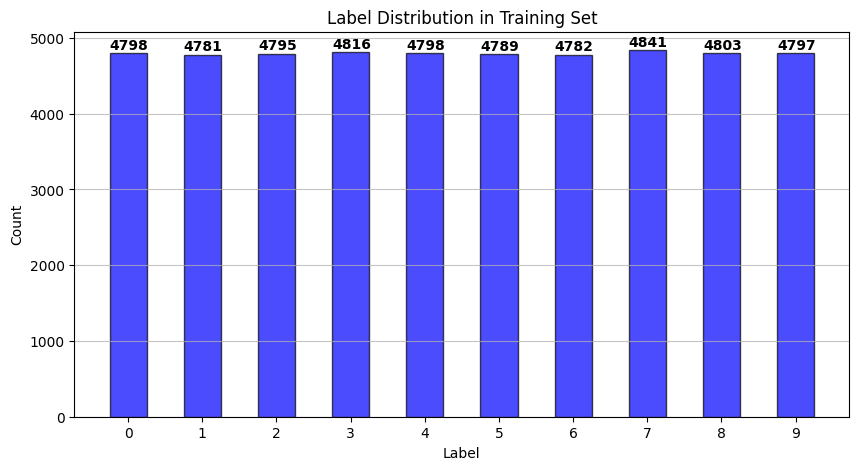

In [172]:
# Calculate the count of each class in the training set
class_counts = np.bincount(train_labels)

# Plot label distribution
plt.figure(figsize=(10, 5))
plt.hist(train_labels, bins=np.arange(11) - 0.5, rwidth=0.5, alpha=0.7, color='blue', edgecolor='black')
plt.xticks(np.arange(10))
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution in Training Set')
plt.grid(axis='y', alpha=0.75)

# Annotate the plot with class counts
for i, count in enumerate(class_counts):
    plt.text(i - 0.25, count + 50, str(count), color='black', fontweight='bold')

plt.show()

**Insight:** As we can see from the histogram, data is distributed across all classes in fairly normal manner. This will help the overall prediction.

### Let's see some images from different class

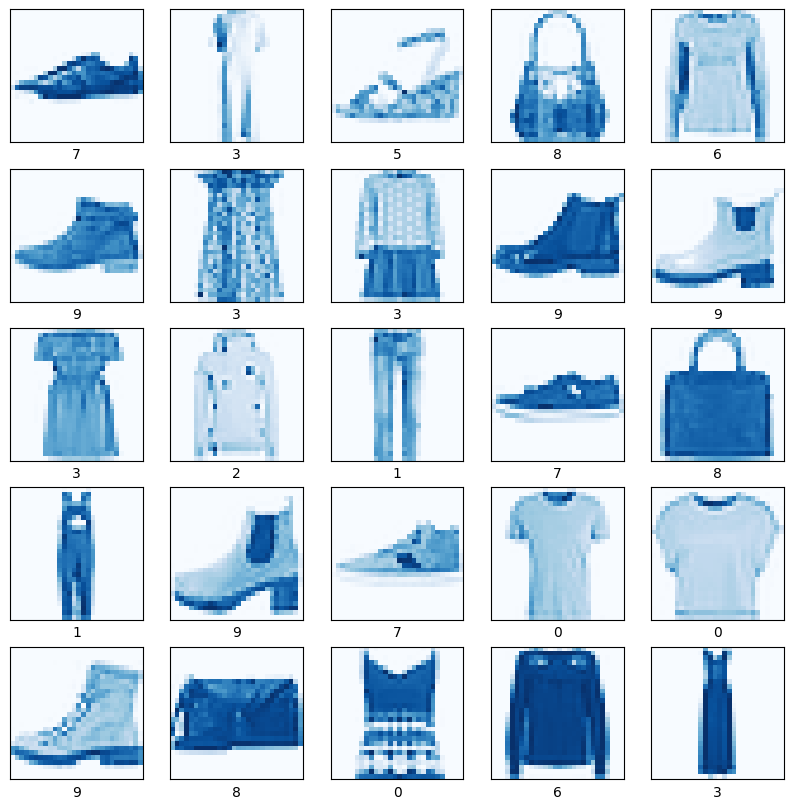

In [173]:
# Display sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='Blues')
    plt.xlabel(train_labels[i])
plt.show()

### Let's see the first image and check how accurately it's labelled,

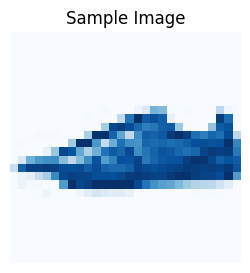

Label: 7, Class Name: Sneaker


In [174]:
# Display the sample image
sample_image = train_images[0]
plt.figure(figsize=(3, 3))
plt.imshow(sample_image, cmap='Blues')
plt.axis('off')
plt.title('Sample Image')
plt.show()

# Define class names
class_names = [
    "T-shirt/top", 
    "Trouser", 
    "Pullover", 
    "Dress", 
    "Coat", 
    "Sandal", 
    "Shirt", 
    "Sneaker", 
    "Bag", 
    "Ankle boot"
]

# Print the label and class name of the sample image
label = train_labels[0]
class_name = class_names[label]
print(f"Label: {label}, Class Name: {class_name}")

### Pixel Distribution

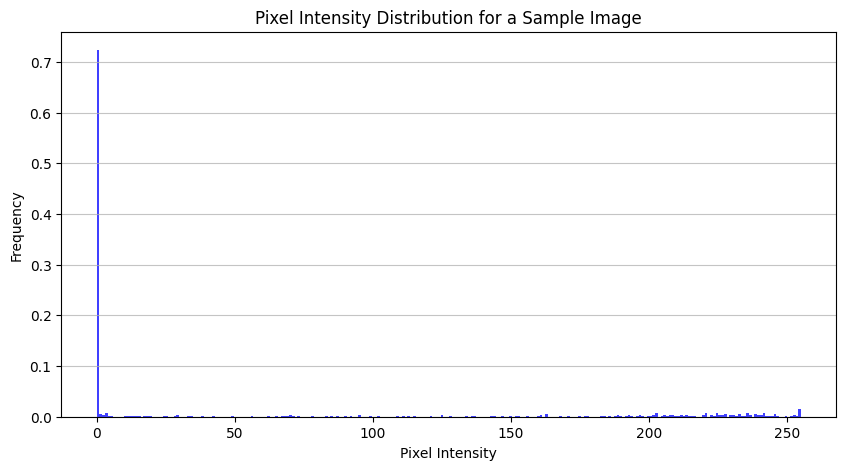

In [175]:
# Plot pixel intensity distribution for a sample image
sample_image = train_images[0]
plt.figure(figsize=(10, 5))
plt.hist(sample_image.ravel(), bins=256, range=(0, 255), density=True, color='blue', alpha=0.75)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Pixel Intensity Distribution for a Sample Image')
plt.grid(axis='y', alpha=0.75)
plt.show()

## Data Processing: 

1. Flattening the Images: The code reshapes the images from a 28x28 matrix to a 1D array of size 784 for each image. This flattening step is necessary when using a fully-connected neural network where each pixel is treated as a separate input feature.
2. Normalization: After flattening, the code normalizes the pixel values to be in the range [0, 1] by dividing by 255.0. This step is common in image processing to ensure that the input values are within a consistent range, which can help improve model performance.

3. Data Type Conversion: Our code explicitly casts the pixel values to float32 data type. This step is also common in deep learning to ensure that the model's calculations are performed with sufficient precision.

In [176]:
train_images = train_images.reshape((48000, 28 * 28)) 
val_images = val_images.reshape((12000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype("float32") / 255  
val_images = val_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255
print(train_images.min())
print(train_images.max())
print(train_images.shape)
print(train_images[0].shape)

0.0
1.0
(48000, 784)
(784,)


## Define and Train three fully-connected feedforward neural network (updated for lab 9)

In [177]:
model1 = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])
model1.compile(optimizer="rmsprop",  
               loss="sparse_categorical_crossentropy",
               metrics=["accuracy"])

**Model Architecture:**
The model is defined using keras.Sequential, which allows stacking layers sequentially.
It consists of two dense (fully connected) layers:
The first layer has 512 units and uses the ReLU activation function. It takes input of shape (784,), which corresponds to the flattened image size (28x28 = 784) from the Fashion MNIST dataset.
The second layer has 10 units (for the 10 classes in the dataset) and uses the softmax activation function to output class probabilities.<br/><br/>
**Compilation:**
The model is compiled using the "rmsprop" optimizer, which is a variant of stochastic gradient descent (SGD) that adapts the learning rate during training.
The loss function is set to "sparse_categorical_crossentropy", which is suitable for multiclass classification tasks with integer labels.
The metric for evaluation is "accuracy", which measures the proportion of correctly classified images.

In [196]:
from keras.callbacks import ModelCheckpoint
checkpoint_filepath = 'model1.hdf5' 

model_checkpoint_callback_1 = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,  # Optionally save only weights instead of the full model
    monitor='val_loss',
    mode='min',  # Monitor validation loss and save on minimum
    save_best_only=True)

In [197]:
history1 = model1.fit(train_images, 
                      train_labels, 
                      epochs=20, 
                      validation_split=0.2, 
                      batch_size=128,
                      callbacks=[model_checkpoint_callback_1]
                    )
history_dict = history1.history
history_dict.keys()

Epoch 1/20
  1/300 [..............................] - ETA: 4s - loss: 0.1805 - accuracy: 0.9062

300/300 [==============================] - 5s 15ms/step - loss: 0.1741 - accuracy: 0.9355 - val_loss: 0.3619 - val_accuracy: 0.8897
Epoch 2/20
300/300 [==============================] - 5s 17ms/step - loss: 0.1662 - accuracy: 0.9361 - val_loss: 0.3817 - val_accuracy: 0.8852
Epoch 3/20
300/300 [==============================] - 5s 17ms/step - loss: 0.1625 - accuracy: 0.9388 - val_loss: 0.3850 - val_accuracy: 0.8934
Epoch 4/20
300/300 [==============================] - 5s 17ms/step - loss: 0.1576 - accuracy: 0.9395 - val_loss: 0.4265 - val_accuracy: 0.8853
Epoch 5/20
300/300 [==============================] - 5s 16ms/step - loss: 0.1563 - accuracy: 0.9413 - val_loss: 0.3748 - val_accuracy: 0.8913
Epoch 6/20
300/300 [==============================] - 5s 15ms/step - loss: 0.1495 - accuracy: 0.9438 - val_loss: 0.4047 - val_accuracy: 0.8906
Epoch 7/20
300/300 [==============================] - 5s 16ms/step - loss: 0.1471 - accuracy: 0.9438 - val_loss: 0.4162 - val_accuracy: 0.8881
Epoch 8/20

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Let's see how Accuracy and Loss function progress as more epochs pass, but as we're gonna do this more than once let's refactor the plotting

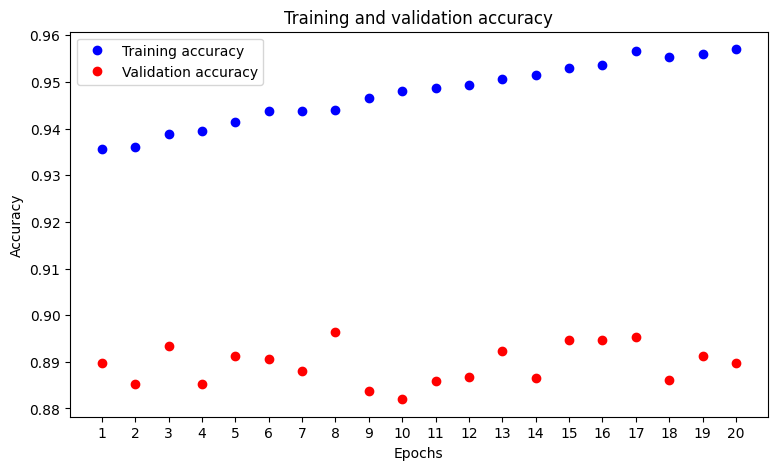

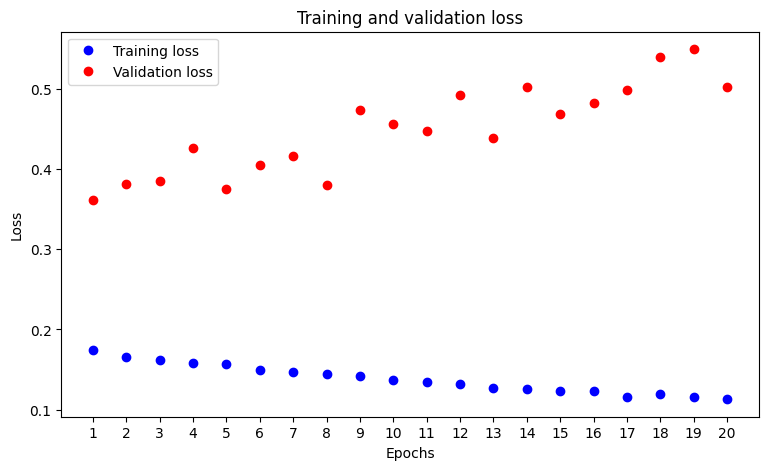

In [198]:
def plotter(history, model_name):

    plt.figure(figsize=(9, 5))
    loss_values = history_dict["accuracy"]
    val_loss_values = history_dict["val_accuracy"]
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, "bo", label="Training accuracy")
    plt.plot(epochs, val_loss_values, "ro", label="Validation accuracy")
    plt.xlabel("Epochs")
    plt.xticks(epochs)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Training and validation accuracy")

    # plot the training and validation loss
    plt.figure(figsize=(9, 5))
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, "bo", label="Training loss")
    plt.plot(epochs, val_loss_values, "ro", label="Validation loss")
    plt.xlabel("Epochs")
    plt.xticks(epochs)
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Training and validation loss")

plotter(history1, model1)

By increasing Units in Hidden Layers,

In [199]:
model2 = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(784,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation="softmax")
])
model2.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [203]:
filepath = 'model2.hdf5' 

model_checkpoint_callback_2 = ModelCheckpoint(
    filepath=filepath,
    save_weights_only=False,  # Optionally save only weights instead of the full model
    monitor='val_loss',
    mode='min',  # Mochnitor validation loss and save on minimum
    save_best_only=True)

In [204]:
history2 = model2.fit(train_images, train_labels, epochs=20, validation_split=0.2, callbacks= [model_checkpoint_callback_2] )

history_dict = history2.history
history_dict.keys()

Epoch 1/20
1200/1200 [==============================] - 30s 25ms/step - loss: 0.4704 - accuracy: 0.8307 - val_loss: 0.3986 - val_accuracy: 0.8518
Epoch 2/20
1200/1200 [==============================] - 30s 25ms/step - loss: 0.3944 - accuracy: 0.8590 - val_loss: 0.3919 - val_accuracy: 0.8623
Epoch 3/20
1200/1200 [==============================] - 30s 25ms/step - loss: 0.3702 - accuracy: 0.8676 - val_loss: 0.3651 - val_accuracy: 0.8741
Epoch 4/20
1200/1200 [==============================] - 31s 26ms/step - loss: 0.3533 - accuracy: 0.8768 - val_loss: 0.5032 - val_accuracy: 0.8548
Epoch 5/20
1200/1200 [==============================] - 30s 25ms/step - loss: 0.3415 - accuracy: 0.8797 - val_loss: 0.3674 - val_accuracy: 0.8753
Epoch 6/20
1200/1200 [==============================] - 33s 28ms/step - loss: 0.3329 - accuracy: 0.8827 - val_loss: 0.3858 - val_accuracy: 0.8778
Epoch 7/20
1200/1200 [==============================] - 28s 24ms/step - loss: 0.3288 - accuracy: 0.8859 - val_loss: 0.3969 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

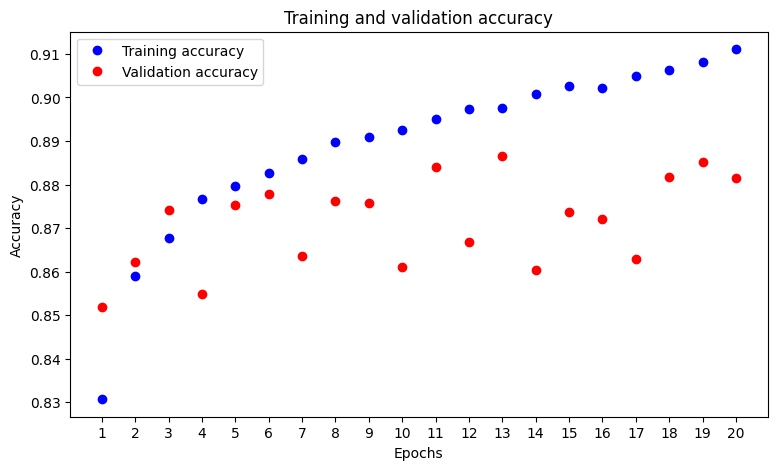

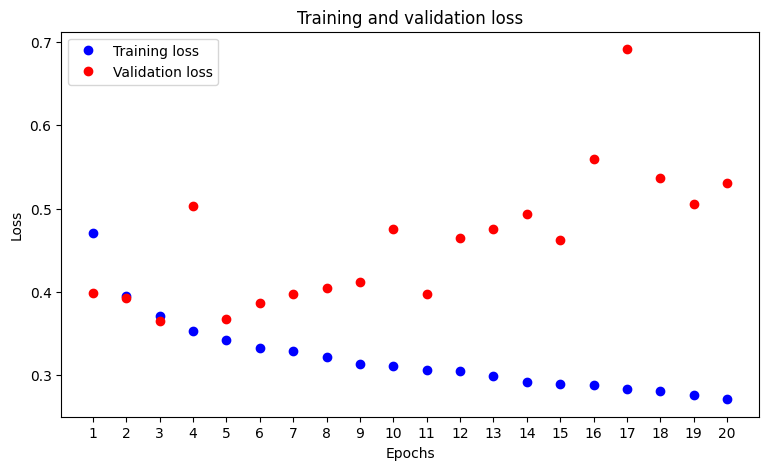

In [205]:
plotter(history2, model2)

By changing the Optimizer (Adam),

In [186]:
model3 = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation="softmax")
])
model3.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [206]:
filepath3 = 'model3.hdf5' 

model_checkpoint_callback_3 = ModelCheckpoint(
    filepath=filepath,
    save_weights_only=False,  # Optionally save only weights instead of the full model
    monitor='val_loss',
    mode='min',  # Mochnitor validation loss and save on minimum
    save_best_only=True)

In [207]:
history3 = model3.fit(train_images, train_labels, epochs=20, validation_split=0.2, callbacks=[model_checkpoint_callback_3])
history_dict = history3.history
history_dict.keys()

Epoch 1/20
1200/1200 [==============================] - 19s 16ms/step - loss: 0.2171 - accuracy: 0.9174 - val_loss: 0.3446 - val_accuracy: 0.8822
Epoch 2/20
1200/1200 [==============================] - 23s 19ms/step - loss: 0.2071 - accuracy: 0.9211 - val_loss: 0.3337 - val_accuracy: 0.8890
Epoch 3/20
1200/1200 [==============================] - 20s 16ms/step - loss: 0.2041 - accuracy: 0.9228 - val_loss: 0.3450 - val_accuracy: 0.8920
Epoch 4/20
1200/1200 [==============================] - 24s 20ms/step - loss: 0.1906 - accuracy: 0.9268 - val_loss: 0.3503 - val_accuracy: 0.8915
Epoch 5/20
1200/1200 [==============================] - 24s 20ms/step - loss: 0.1859 - accuracy: 0.9288 - val_loss: 0.3481 - val_accuracy: 0.8963
Epoch 6/20
1200/1200 [==============================] - 25s 21ms/step - loss: 0.1788 - accuracy: 0.9311 - val_loss: 0.3531 - val_accuracy: 0.8901
Epoch 7/20
1200/1200 [==============================] - 20s 17ms/step - loss: 0.1728 - accuracy: 0.9333 - val_loss: 0.3756 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

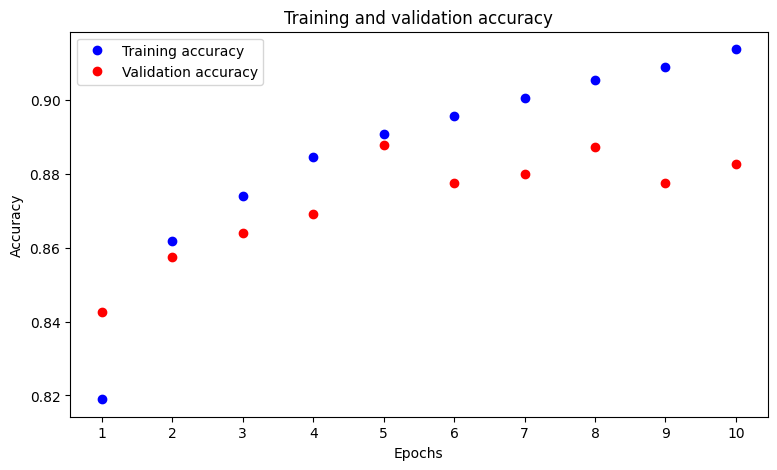

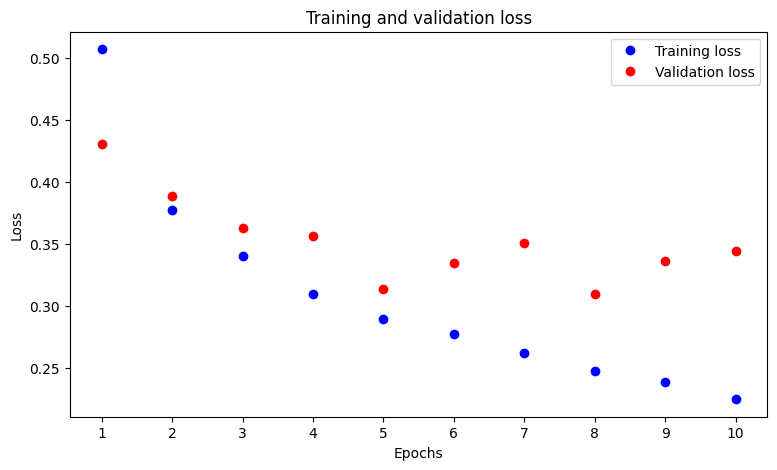

In [189]:
plotter(history3, model3)

## But which one of them is better (model evaluation)

In [220]:
from tensorflow.keras.models import load_model

model_1 = load_model('model1.hdf5')
print(model_1)

model_2 = load_model('model2.hdf5')
print(model_2)

model_3 = load_model('model3.hdf5')
print(model_3)


from sklearn.metrics import classification_report

# Make predictions for each model
y_pred_prob_1 = model_1.predict(val_images)
y_pred_1 = np.argmax(y_pred_prob_1, axis=1)

y_pred_prob_2 = model_2.predict(val_images)
y_pred_2 = np.argmax(y_pred_prob_2, axis=1)

y_pred_prob_3 = model_3.predict(val_images)
y_pred_3 = np.argmax(y_pred_prob_3, axis=1)

375/375 [==============================] - 1s 3ms/step


In [222]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Model 1
val_accuracy_1 = accuracy_score(val_labels, y_pred_1)
val_precision_1 = precision_score(val_labels, y_pred_1, average='weighted')
val_recall_1 = recall_score(val_labels, y_pred_1, average='weighted')
val_f1_1 = f1_score(val_labels, y_pred_1, average='weighted')

# Model 2
val_accuracy_2 = accuracy_score(val_labels, y_pred_2)
val_precision_2 = precision_score(val_labels, y_pred_2, average='weighted')
val_recall_2 = recall_score(val_labels, y_pred_2, average='weighted')
val_f1_2 = f1_score(val_labels, y_pred_2, average='weighted')

# Model 3
val_accuracy_3 = accuracy_score(val_labels, y_pred_3)
val_precision_3 = precision_score(val_labels, y_pred_3, average='weighted')
val_recall_3 = recall_score(val_labels, y_pred_3, average='weighted')
val_f1_3 = f1_score(val_labels, y_pred_3, average='weighted')

# Print the results
print("\nModel 1:")
print("Accuracy on validation dataset:", val_accuracy_1)
print("Precision on validation dataset:", val_precision_1)
print("Recall on validation dataset:", val_recall_1)
print("F1 Score on validation dataset:", val_f1_1)

print("\nModel 2:")
print("Accuracy on validation dataset:", val_accuracy_2)
print("Precision on validation dataset:", val_precision_2)
print("Recall on validation dataset:", val_recall_2)
print("F1 Score on validation dataset:", val_f1_2)

print("\nModel 3:")
print("Accuracy on validation dataset:", val_accuracy_3)
print("Precision on validation dataset:", val_precision_3)
print("Recall on validation dataset:", val_recall_3)
print("F1 Score on validation dataset:", val_f1_3)


Model 1:
Accuracy on validation dataset: 0.88525
Precision on validation dataset: 0.8875534150193771
Recall on validation dataset: 0.88525
F1 Score on validation dataset: 0.8850147251099114

Model 2:
Accuracy on validation dataset: 0.8839166666666667
Precision on validation dataset: 0.8851929568053638
Recall on validation dataset: 0.8839166666666667
F1 Score on validation dataset: 0.883039467419338

Model 3:
Accuracy on validation dataset: 0.8846666666666667
Precision on validation dataset: 0.8858662575776971
Recall on validation dataset: 0.8846666666666667
F1 Score on validation dataset: 0.8844463794153355


Comparing the f1 scores we can determine that 'Model 1' is the best model with accuracy of 88.5%

## Run model on Test set

In [225]:
from sklearn.metrics import confusion_matrix, classification_report

test_loss, test_accuracy = model1.evaluate(test_images, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Generate predictions on the test set
y_pred = model1.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(test_labels, y_pred_classes)
print("\n Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(test_labels, y_pred_classes)
print("\n Classification Report:")
print(class_report)

313/313 [==============================] - 1s 3ms/step - loss: 0.5688 - accuracy: 0.8846
Test Loss: 0.5687621235847473
Test Accuracy: 0.8845999836921692
313/313 [==============================] - 1s 3ms/step

 Confusion Matrix:
[[837   2  18  10   3   0 123   1   6   0]
 [  2 972   1  15   4   0   6   0   0   0]
 [ 13   0 837   5  78   0  67   0   0   0]
 [ 31   3  40 845  29   1  50   0   1   0]
 [  0   0  86  26 777   0 110   0   1   0]
 [  0   0   0   1   0 970   0  14   0  15]
 [115   0  84  16  42   0 740   0   3   0]
 [  0   0   0   0   0  22   0 955   0  23]
 [  3   0   6   2   9   4  11   3 961   1]
 [  1   0   0   0   0  12   2  33   0 952]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.78      0.84      0.81      1000
           3       0.92      0.84      0.88      1000
           4       0.82      0.78      0.80  

The test results indicate that the model achieved an accuracy of approximately 88.46% on the test dataset. Here are some insights from the quantitative metrics:

1. **Accuracy**: The overall accuracy of the model is 88.46%, meaning it correctly classified 88.46% of the instances in the test set.

2. **Confusion Matrix**: The confusion matrix provides a breakdown of the actual vs. predicted classes. For example, it shows that for class 0 (T-shirt/top), the model correctly predicted 837 instances, but misclassified 18 instances as class 2 (Pullover).

3. **Precision**: Precision is the ratio of correctly predicted positive observations to the total predicted positives. For example, the precision for class 0 is 0.84, indicating that 84% of instances predicted as class 0 were actually class 0.

4. **Recall**: Recall is the ratio of correctly predicted positive observations to the all observations in actual class. For example, the recall for class 0 is 0.84, meaning the model correctly identified 84% of all actual class 0 instances.

5. **F1-Score**: The F1-score is the weighted average of Precision and Recall. It provides a balance between Precision and Recall. For example, the F1-score for class 0 is 0.84, indicating a good balance between Precision and Recall for class 0.

6. **Support**: The support is the number of actual occurrences of the class in the specified dataset. For example, the support for class 0 is 1000, meaning there are 1000 instances of class 0 in the test set.

Based on these metrics, we can conclude that the model performs reasonably well on the test dataset, with good overall accuracy and balanced performance across different classes.

## 7. What if we wanted to increase the precision for class '5', how can we do that without changing the model or retraining? provide code that exemplifies this.

To increase the precision for a specific class without changing the model or retraining, we can adjust the decision threshold for that class. By default, the model predicts the class with the highest probability. However,we can increase the threshold for class '5' so that the model only predicts it when it is more certain. This can potentially increase the precision for class '5' at the cost of possibly reducing its recall.

In [236]:
# Calculate precision for class '5' before modification
precision_class_5_before = precision_score(test_labels, y_pred_classes, labels=[5], average='macro', zero_division=0)
print("Precision for class '5' before modification:", precision_class_5_before)

# Define the original model predictions
y_pred_prob = model1.predict(test_images)

# Set a higher threshold for classifying instances as class '5'
threshold = 0.98

# Modify predictions based on the threshold
# Make a copy of original predictions
y_pred_classes_modified = y_pred_classes.copy() 
# Assign class '5' to class '0' if below threshold and originally classified as class '5'
y_pred_classes_modified[(y_pred_prob[:, 5] < threshold) & (y_pred_classes_modified == 5)] = 0 

# Calculate precision for class '5' after modification
precision_class_5 = precision_score(test_labels, y_pred_classes_modified, labels=[5], average='macro', zero_division=0)
print("Precision for class '5' after modification:", precision_class_5)

Precision for class '5' before modification: 0.9613478691774033
313/313 [==============================] - 1s 3ms/step
Precision for class '5' after modification: 0.9825641025641025


* After setting the threshold value to 0.9 we can clearly see that there is minor (0.02 points) increased in precision for class '5'.

## 8. What if we wanted to increase the recall for class '5', how can we do that without changing the model or retraining? provide code that exemplifies this.

Similarly to increser precision,

In [240]:
# Calculate recall for class '5' before modification
recall_class_5_before = recall_score(test_labels, y_pred_classes, labels=[5], average='macro', zero_division=0)
print("Recall for class '5' before modification:", recall_class_5_before)

# Define the original model predictions
y_pred_prob = model1.predict(test_images)

# Set a lower threshold for classifying instances as class '5'
threshold = 0.01

# Modify predictions based on the threshold
# Make a copy of original predictions
y_pred_classes_modified = y_pred_classes.copy()  
# Assign class '5' to instances above threshold and not originally classified as class '5'
y_pred_classes_modified[(y_pred_prob[:, 5] >= threshold) & (y_pred_classes_modified != 5)] = 5 

# Calculate recall for class '5' after modification
recall_class_5 = recall_score(test_labels, y_pred_classes_modified, labels=[5], average='macro', zero_division=0)
print("Recall for class '5' after modification:", recall_class_5)

Recall for class '5' before modification: 0.97
313/313 [==============================] - 1s 4ms/step
Recall for class '5' after modification: 0.98


* After changing the threshold value to 0.01, there was a minor increase in the recall for class '5', rising from 0.97 to 0.98.